ML Model to predict Bike Demand from a real-time dataset.

Importing the libraries.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np


In [33]:
dataset=pd.read_csv('hour.csv')
bikes=dataset.copy()

In [34]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
dataset.shape

(17379, 17)

Clearing the useless features.

In [36]:
bikes=bikes.drop(['index','date','casual','registered'],axis=1)

In [37]:
bikes.shape

(17379, 13)

In [38]:
bikes

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [39]:
bikes.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

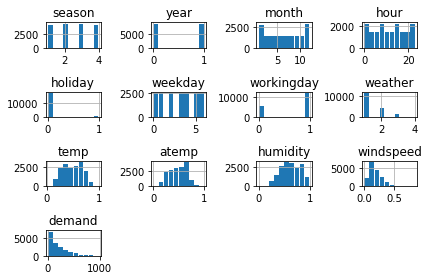

In [40]:
bikes.hist(rwidth=0.9)
plt.tight_layout()

In [41]:
bikes['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [42]:
bikes['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

Check Multple LR Assumptions.

In [43]:
correlation=bikes[['temp','atemp','humidity','windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


Dropping features

In [44]:
bikes=bikes.drop(['atemp','windspeed','year','weekday','workingday'],axis=1)

In [45]:
bikes.shape

(17379, 8)

Check for Auto-Corelation Note: We need to convert to float

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f357ceb5950>)

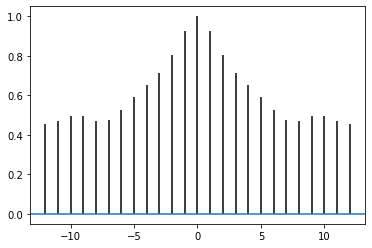

In [46]:
df1=pd.to_numeric(bikes['demand'],downcast='float')
plt.acorr(df1,maxlags=12)

In [47]:
df1=bikes['demand']
df2=np.log(df1)

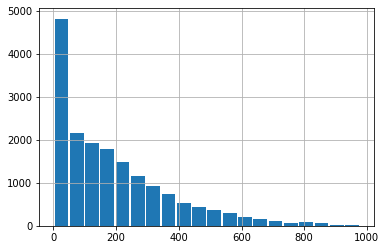

In [48]:
plt.figure()
df1.hist(rwidth=0.9,bins=20)

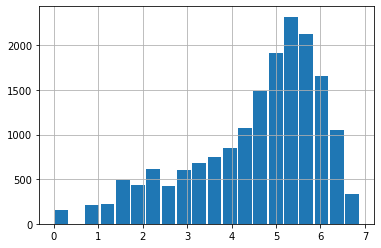

In [49]:
df2.hist(rwidth=0.9,bins=20)

In [50]:
bikes['demand']=np.log(bikes['demand'])

In [51]:
t_1=bikes['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

In [52]:
t_2=bikes['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

In [53]:
t_3=bikes['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

In [54]:
bikes_prep_lag=pd.concat([bikes,t_1,t_2,t_3],axis=1)

In [55]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [56]:
bikes_prep_lag=bikes_prep_lag.dropna()

In [57]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [58]:
bikes_prep_lag['season']=bikes_prep_lag['season'].astype('category')
bikes_prep_lag['month']=bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour']=bikes_prep_lag['hour'].astype('category')
bikes_prep_lag['holiday']=bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather']=bikes_prep_lag['weather'].astype('category')
bikes_prep_lag=pd.get_dummies(bikes_prep_lag,drop_first=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [60]:
bikes_prep_lag.shape

(17376, 47)

Split Data

In [61]:
Y=bikes_prep_lag[['demand']]
X=bikes_prep_lag.drop(['demand'],axis=1)

In [63]:
tr_size=0.7*len(X)
tr_size=int(tr_size)

In [64]:
X_train=X.values[0:tr_size]
X_test=X.values[tr_size:len(X)]

In [65]:
Y_train=Y.values[0:tr_size]
Y_test=Y.values[tr_size:len(Y)]

Model Training

In [66]:
from sklearn.linear_model import LinearRegression
std_reg=LinearRegression()
std_reg.fit(X_train,Y_train)

LinearRegression()

In [67]:
r2_train=std_reg.score(X_train,Y_train)
r2_test=std_reg.score(X_test,Y_test)

In [68]:
print(r2_test,r2_train)

0.9287151360253385 0.9195240591465778


In [69]:
y_predict=std_reg.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(Y_test,y_predict))

In [71]:
rmse

0.38098800498170443

rmsle calculation

In [72]:
y_test_e=[]
y_pred_e=[]

for i in range(0,len(Y_test)):
  y_test_e.append(math.exp(Y_test[i]))

for i in range(0,len(Y_test)):
  y_pred_e.append(math.exp(y_predict[i]))


In [74]:
log_sq_sum=0.0
for i in range(0,len(y_test_e)):
  log_a=math.log(y_test_e[i] + 1)
  log_p=math.log(y_pred_e[i] + 1)
  log_diff=(log_p-log_a)**2
  log_sq_sum=log_sq_sum+log_diff

rmsle=math.sqrt(log_sq_sum/len(Y_test))
print(rmsle) 

0.3560941706980211
